Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3170560000.0000 - mae: 51266.0742 - val_loss: 3742983936.0000 - val_mae: 54024.2852
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3155941888.0000 - mae: 51559.4609 - val_loss: 3738158592.0000 - val_mae: 53980.8203
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3216004352.0000 - mae: 51469.2461 - val_loss: 3720726016.0000 - val_mae: 53825.7734
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3095712768.0000 - mae: 50911.3359 - val_loss: 3672248832.0000 - val_mae: 53398.4336
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3167402752.0000 - mae: 51095.8398 - val_loss: 3562316032.0000 - val_mae: 52427.2695
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2885328128.0000 - mae: 48942.4883 - val_loss: 3369551872.0000 - val_mae: 50692.8047
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2815049984.0000 - mae: 47633.4492 - val_loss: 3076687360.0000 - val_mae: 47947.9844
Epoch

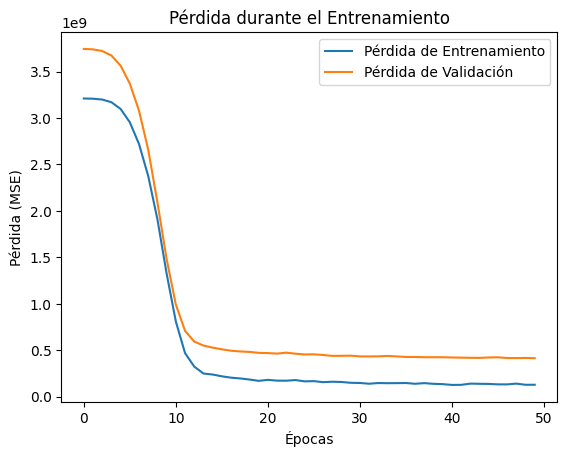

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar datos
path="C:/Users/galla/Dropbox/PC/Documents/1 Pedro G Gallardo/Master IA y Big Data/Casa/proyecto tesla/ProyectoTesla/data/data_prepared"
os.chdir(path)
data = pd.read_csv('data_prepared_dummies.csv', sep=';')

# Dividir en características (X) y objetivo (y)
X = data.drop(columns=['precio'])
y = data['precio']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de la red neuronal
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Resultados de la Red Neuronal:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Visualizar la evolución del entrenamiento

plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3240657920.0000 - mae: 51552.0898 - val_loss: 3260456960.0000 - val_mae: 52383.5391
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3552690688.0000 - mae: 53579.4141 - val_loss: 3257534464.0000 - val_mae: 52356.3945
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3088069888.0000 - mae: 50465.0664 - val_loss: 3247102464.0000 - val_mae: 52261.0898
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3409323520.0000 - mae: 53057.0312 - val_loss: 3218294528.0000 - val_mae: 52001.8945
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3431839488.0000 - mae: 52966.7109 - val_loss: 3152224000.0000 - val_mae: 51406.9258
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2946712320.0000 - mae: 49189.7227 - val_loss: 3017100800.0000 - val_mae: 50183.8477
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3067567104.0000 - mae: 49966.5000 - val_loss: 2779265536.0000 - val_mae: 47970.4414
Epoch

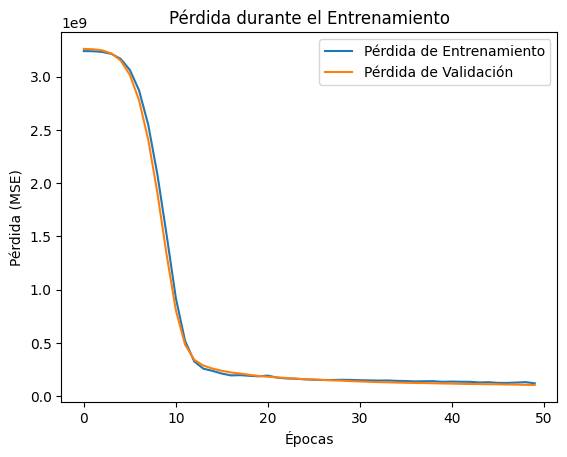

In [2]:
# Cargar datos
path="C:/Users/galla/Dropbox/PC/Documents/1 Pedro G Gallardo/Master IA y Big Data/Casa/proyecto tesla/ProyectoTesla/data/data_prepared"
os.chdir(path)
data = pd.read_csv('data_prepared_dummies_outlier.csv', sep=';')

# Dividir en características (X) y objetivo (y)
X = data.drop(columns=['precio'])
y = data['precio']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de la red neuronal
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Resultados de la Red Neuronal:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Visualizar la evolución del entrenamiento

plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3199010048.0000 - mae: 51337.5430 - val_loss: 3916256000.0000 - val_mae: 55096.5156
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3325371136.0000 - mae: 52177.1250 - val_loss: 3912724992.0000 - val_mae: 55064.9453
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3067092992.0000 - mae: 50841.4844 - val_loss: 3901407488.0000 - val_mae: 54964.8672
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3032998912.0000 - mae: 50436.6484 - val_loss: 3872187904.0000 - val_mae: 54708.9961
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2974668288.0000 - mae: 50101.2344 - val_loss: 3807955712.0000 - val_mae: 54147.4883
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3135638272.0000 - mae: 50673.4297 - val_loss: 3682983424.0000 - val_mae: 53048.7344
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2749656832.0000 - mae: 47980.1914 - val_loss: 3463955968.0000 - val_mae: 51076.000

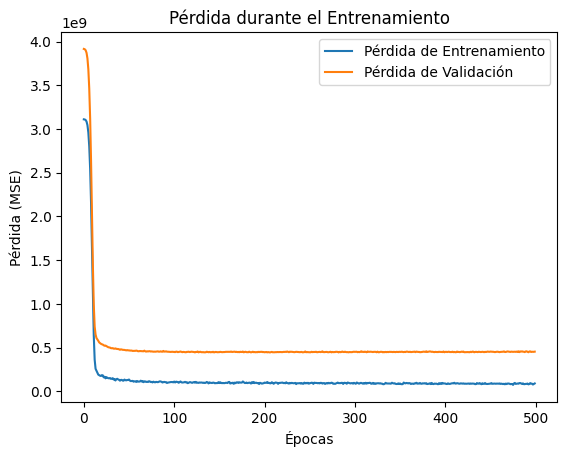

In [4]:
# Cargar datos
path="C:/Users/galla/Dropbox/PC/Documents/1 Pedro G Gallardo/Master IA y Big Data/Casa/proyecto tesla/ProyectoTesla/data/data_prepared"
os.chdir(path)
data = pd.read_csv('data_prepared_dummies.csv', sep=';')

# Dividir en características (X) y objetivo (y)
X = data.drop(columns=['precio'])
y = data['precio']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de la red neuronal
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Resultados de la Red Neuronal:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Visualizar la evolución del entrenamiento

plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()